# 타이타닉 데이터 EDA

## EDA란?
Exploratory data analysis(탐색적 데이터 분석)으로 주어진 데이터를 다양한 방법으로 정보를 찾아내는 데이터 분석 방법  
모델링 이전 데이터를 확인하고 흟어보면서 데이터에 대한 이해를 목적으로 시행되며 이를 바탕으로 정교한 모델링을 수행 할 수 있다.

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## EDA 진행 예시

### 타이타닉 탑승자 데이터 불러오기

In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 데이터 로딩 및 확인
df = pd.read_csv('/content/drive/MyDrive/이어드림스쿨/20220426 프로젝트오리엔테이션/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

각 작업을 거친 후 데이터에 대한 리포트 혹은 시각화를 통해 얻을 수 있는 정보를 기술 해봅니다.  
위의 정보를 바탕으로 1309개의 샘플이 존재하지만 몇몇 개의 컬럼에는 결측치(비어있는 값)이 있음을 확인 할 수 있습니다

In [ ]:
## canbin, body는 다루기 힘듦
## age, fare, embarked, home.dest 결측치 있음

In [144]:
df['age'].fillna(df['age'].mean(),  inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [145]:
df['fare'].fillna(df['fare'].mean(),  inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [11]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'boat', 'home.dest'],
      dtype='object')

In [255]:
df = df[ ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',  'fare', 'embarked', 'boat', 'home.dest' , 'age_cat']  ]
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S,2,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S,11,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",adult


In [151]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.883193,1.041658,0.865560,51.738879
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881138,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


전체 탑승객의 생존률, 평균 연령 정도가 우리가 확인하고 추후 생각해보아야 할 데이터 같습니다.

In [152]:
df.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366371,0.060832,0.018322,-0.558477
survived,-0.312469,1.000000,-0.050198,-0.027825,0.082660,0.244208
age,-0.366371,-0.050198,1.000000,-0.190747,-0.130872,0.171521
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160224
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221522
fare,-0.558477,0.244208,0.171521,0.160224,0.221522,1.000000


In [153]:
corr_df = df.corr()
find_num = 0.4
def draw_color(x,color):
    if (x >= find_num or x <= (-find_num)) & (x != 1):
        color = f'background-color:{color}'
        return color
    else:
        return ''
    
corr_df.style.applymap(draw_color, color='#ff9090')

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366371,0.060832,0.018322,-0.558477
survived,-0.312469,1.000000,-0.050198,-0.027825,0.082660,0.244208
age,-0.366371,-0.050198,1.000000,-0.190747,-0.130872,0.171521
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160224
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221522
fare,-0.558477,0.244208,0.171521,0.160224,0.221522,1.000000


In [ ]:
# 위의 상관관계에 나타나지 않은 columns : 'name', 'sex', 'ticket', 'embarked', 'boat', 'home.dest' 

## 샘플링으로 데이터 살펴보기
판다스 수업시간에 진행했던 팬시 인덱싱을 사용하여 다양한 가정을 통한 데이터를 살펴보겠습니다.  
전체 탑승객의 생존률은 38% 정도였지만 1등급 객실에 승선한 여성의 경우의 생존률을 알아보겠습니다.

In [154]:
how = {
    "pclass" : np.mean,
    "age" : np.mean,
    "sibsp" : np.mean,
    "parch" : np.mean,
    "fare" : np.mean
}
df.groupby("survived").agg(how)

# "sex" : np.mean,
#"embarked" : np.mean,
#"boat" : np.mean,
#"home.dest" : np.mean,

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.389365,0.521632,0.328801,23.366119
1,1.962000,29.058826,0.462000,0.476000,49.361184


In [155]:
df['pclass'].unique()

array([1, 2, 3])

In [156]:
df['age'].unique()

array([29.        ,  0.92      ,  2.        , 30.        , 25.        ,
       48.        , 63.        , 39.        , 53.        , 71.        ,
       47.        , 18.        , 24.        , 26.        , 80.        ,
       29.88113767, 50.        , 32.        , 36.        , 37.        ,
       42.        , 19.        , 35.        , 28.        , 45.        ,
       40.        , 58.        , 22.        , 41.        , 44.        ,
       59.        , 60.        , 33.        , 17.        , 11.        ,
       14.        , 49.        , 76.        , 46.        , 27.        ,
       64.        , 55.        , 70.        , 38.        , 51.        ,
       31.        ,  4.        , 54.        , 23.        , 43.        ,
       52.        , 16.        , 32.5       , 21.        , 15.        ,
       65.        , 28.5       , 45.5       , 56.        , 13.        ,
       61.        , 34.        ,  6.        , 57.        , 62.        ,
       67.        ,  1.        , 12.        , 20.        ,  0.83

In [157]:
df['name'].unique()

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine', ..., 'Zakarian, Mr. Mapriededer',
       'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo'], dtype=object)

In [158]:
df['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [159]:
df['parch'].unique()

array([0, 2, 1, 4, 3, 5, 6, 9])

In [160]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [161]:
df['boat'].unique()

array(['2', '11', nan, '3', '10', 'D', '4', '9', '6', 'B', '8', 'A', '5',
       '7', 'C', '14', '5 9', '13', '1', '15', '5 7', '8 10', '12', '16',
       '13 15 B', 'C D', '15 16', '13 15'], dtype=object)

In [162]:
df['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

In [163]:
df[(df['pclass']==1) & (df['sex']=='female') & (df['survived']==1)]['survived'].value_counts()

1    139
Name: survived, dtype: int64

In [164]:
# 조건에 맞는 데이터 샘플링 645명, 생존자 400명
df[   (df['pclass'] == 1) & (df['sex'] =='female')]   ['survived'].sum()

139

### 시각화로 데이터 살펴보기

#### 전체 탑승자 연령대 시각화

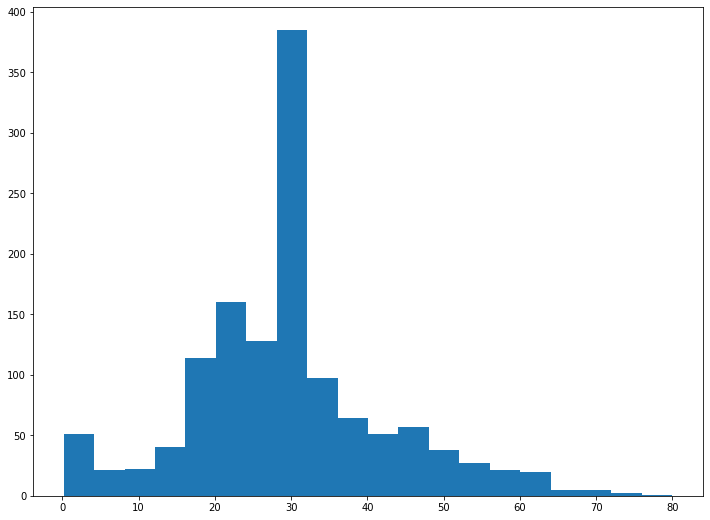

In [165]:
# 판다스 내장 함수로 시각화 가능
df['age'].hist(bins=20,figsize=(12,9),grid=False);

### 객실 등급별 생존률
판다스 수업시간에 진행하지는 않았지만 각 데이터의 범주에 따라 데이터를 분류하는 groupby 함수의 예시를 사용해보겠습니다.

In [166]:
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare
pclass,,,,,
1,0.619195,38.039580,0.436533,0.365325,87.508992
2,0.429603,29.528333,0.393502,0.368231,21.179196
3,0.255289,26.302224,0.568406,0.400564,13.331087


### 연령별 생존률


In [167]:
df.groupby('age').mean()

,pclass,survived,sibsp,parch,fare
age,,,,,
0.17,3.0,1.000000,1.000000,2.0,20.575000
0.33,3.0,0.000000,0.000000,2.0,14.400000
0.42,3.0,1.000000,0.000000,1.0,8.516700
0.67,2.0,1.000000,1.000000,1.0,14.500000
0.75,3.0,0.666667,1.666667,1.0,17.430533
...,...,...,...,...,...
70.50,3.0,0.000000,0.000000,0.0,7.750000
71.00,1.0,0.000000,0.000000,0.0,42.079200
74.00,3.0,0.000000,0.000000,0.0,7.775000


In [149]:
df = df[ ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'boat', 'home.dest', 'age_cat' ]  ]
df.head()

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,boat,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S,2,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S,11,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON",adult


### 성별 생존률

In [197]:
df.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare
sex,,,,,,
female,2.154506,0.727468,28.886950,0.652361,0.633047,46.198097
male,2.372479,0.190985,30.430712,0.413998,0.247924,26.163072


### 형제 혹은 부부의 수별 생존률



In [138]:
df.groupby('sibsp').mean()

,pclass,survived,age,parch,fare
sibsp,,,,,
0,2.351291,0.346801,30.921766,0.181818,25.785406
1,2.034483,0.510972,31.058071,0.717868,48.711300
2,2.333333,0.452381,23.569444,0.571429,48.940576
3,2.550000,0.300000,16.312500,1.250000,71.332090
4,3.000000,0.136364,8.772727,1.545455,30.594318
5,3.000000,0.000000,10.166667,2.000000,46.900000
8,3.000000,0.000000,14.500000,2.000000,69.550000


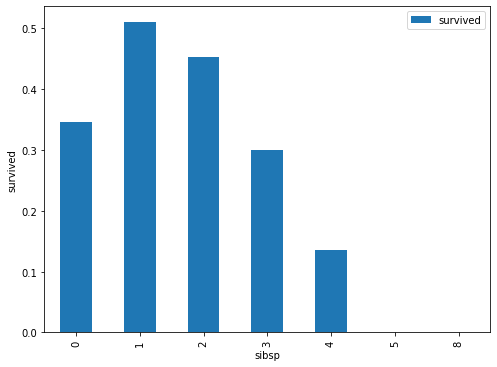

In [258]:
s = df.groupby('sibsp').mean()
s.pop('fare')
s.pop('age')
s.pop('pclass')
s.pop('parch')
s.plot.bar(figsize=(8,6), ylabel = 'survived')

> 형제 혹은 부부의 수가 1명 이상일 수록 생존률 감소

### 부모, 혹은 자녀의 수별 생존률

In [139]:
df.groupby('parch').mean()

,pclass,survived,age,sibsp,fare
parch,,,,,
0,2.311377,0.335329,31.969401,0.243513,26.329820
1,2.158824,0.588235,24.965625,1.029412,50.078358
2,2.300885,0.504425,18.975979,1.902655,61.346275
3,2.125000,0.625000,38.875000,0.875000,86.688537
4,2.333333,0.166667,47.600000,0.666667,104.723617
5,3.000000,0.166667,39.333333,0.666667,32.356250
6,3.000000,0.000000,41.500000,1.000000,46.900000
9,3.000000,0.000000,NaN,1.000000,69.550000


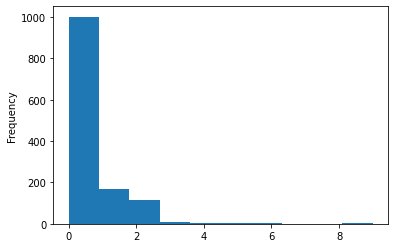

In [168]:
df['parch'].plot.hist()

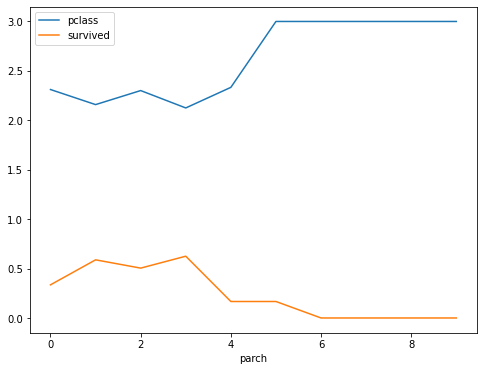

In [265]:
p = df.groupby('parch').mean()
p.pop('fare')
p.pop('age')
p.pop('sibsp')
p.plot(figsize=(8,6))

> 부모, 혹은 자녀의 수가 4명일 때 부터 생존률 급감하는 것으로 나타나고, 자녀수가 5명 이상인 사람들은 대부분 3등급석 티켓을 구매한 것을 알 수 있다.

### 선착장정보별 생존률

In [245]:
df.groupby('embarked').mean()

,pclass,survived,age,sibsp,parch,fare
embarked,,,,,,
C,1.851852,0.555556,31.805652,0.400000,0.370370,62.336267
Q,2.894309,0.357724,29.372545,0.341463,0.113821,12.409012
S,2.347921,0.332604,29.337046,0.550328,0.426696,27.425253


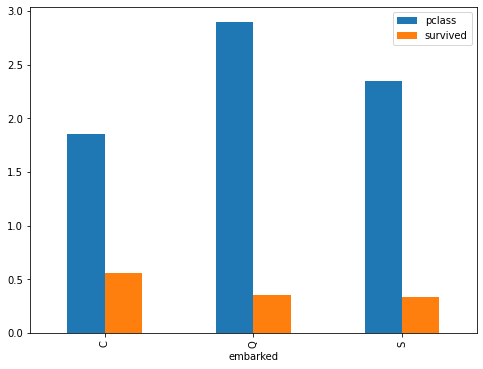

In [267]:
e = df.groupby('embarked').mean()
e.pop('fare')
e.pop('age')
e.pop('sibsp')
e.pop('parch')
e.plot.bar(figsize=(8,6))

> 선착장 3곳 (C, Q, S) 중에서 C선착장에서 탄 사람들의 생존률이 약간 높았고, 다른 선착장보다 객실 등급이 상대적으로 높은(1등급에 가까운) 사람들이 C 선착장에서 많이 탄 것으로 보인다.

### 탈출 보트 번호별 생존률

In [141]:
df.groupby('boat').mean()

,pclass,survived,age,sibsp,parch,fare
boat,,,,,,
1,1.000000,1.000000,45.250000,0.600000,0.000000,46.980020
10,1.931034,1.000000,25.966296,0.862069,0.965517,62.154886
11,1.960000,1.000000,22.114583,0.480000,0.520000,37.648832
12,2.105263,0.947368,26.710526,0.473684,0.421053,19.688811
13,2.641026,1.000000,23.478387,0.256410,0.307692,16.143479
13 15,3.000000,1.000000,23.500000,0.000000,0.000000,7.510400
13 15 B,3.000000,1.000000,29.000000,0.000000,0.000000,7.750000
14,2.000000,0.969697,24.833333,0.424242,0.909091,32.687879
15,2.918919,1.000000,26.132353,0.432432,0.459459,11.715881


#### 탈출 보트에서 전원 생존이 아닌 경우

In [223]:
b = df.groupby('boat').mean()
b[b[ 'survived']  != 1]

,pclass,survived,age,sibsp,parch,fare
boat,,,,,,
12,2.105263,0.947368,26.710526,0.473684,0.421053,19.688811
14,2.000000,0.969697,25.292225,0.424242,0.909091,32.687879
A,2.454545,0.636364,29.342025,0.272727,0.181818,24.167045
B,2.222222,0.888889,32.084697,0.000000,0.222222,24.306478
C,2.894737,0.973684,22.902931,0.447368,0.552632,19.374447
D,2.000000,0.950000,29.408398,0.800000,0.350000,35.992500


### 출신별 생존률

In [142]:
df.groupby('home.dest').mean()

,pclass,survived,age,sibsp,parch,fare
home.dest,,,,,,
"?Havana, Cuba",1.0,0.00,28.500000,0.000000,0.000000,27.7208
"Aberdeen / Portland, OR",2.0,1.00,26.000000,0.000000,0.000000,15.7500
"Albany, NY",1.0,1.00,31.000000,0.000000,0.000000,28.5375
"Altdorf, Switzerland",3.0,0.00,21.500000,1.000000,0.000000,17.8000
"Amenia, ND",1.0,0.50,46.500000,1.000000,0.000000,61.1750
...,...,...,...,...,...,...
"Worcester, England",2.0,1.00,19.000000,0.000000,0.000000,26.0000
"Worcester, MA",1.5,0.00,37.000000,0.000000,0.000000,32.5000
"Yoevil, England / Cottage Grove, OR",2.0,1.00,26.000000,0.000000,0.000000,13.5000


In [206]:
(len(df['home.dest'].unique()))

370

## 전체 생존률

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


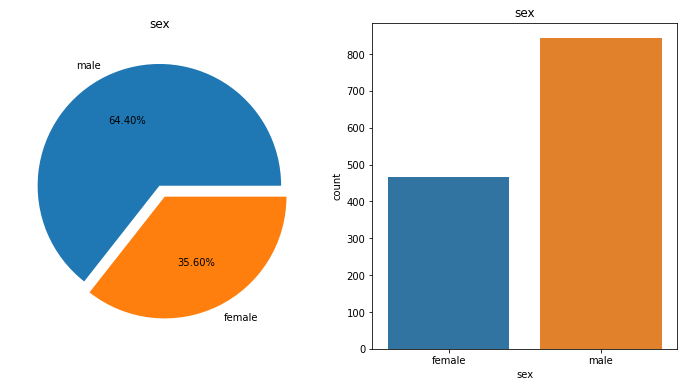

In [57]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=graph1)
graph1.set_title('sex')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('sex',data=df,ax=graph2)
graph2.set_title('sex')
plt.show(fig)

## 성별에 따른 생존자 분류

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


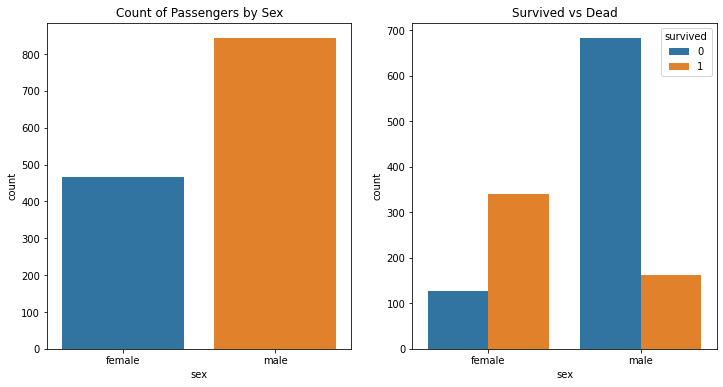

In [58]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
graph2 = fig.add_subplot(1,2,2)

sns.countplot('sex',data=df, ax=graph1)
graph1.set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=df, ax=graph2)
graph2.set_title('Survived vs Dead')
plt.show()

## 연령, 성별, 객실등급 한꺼번에

In [199]:
df.groupby(['age_cat', 'sex', 'pclass']).agg(how)

survived
age_cat sex    pclass          
baby    female 1       0.000000
               2       1.000000
               3       0.482759
        male   1       1.000000
               2       1.000000
               3       0.354839
teenage female 1       1.000000
               2       0.937500
               3       0.540541
        male   1       0.428571
               2       0.117647
               3       0.128571
adult   female 1       0.966667
               2       0.888889
               3       0.435294
        male   1       0.375000
               2       0.078947
               3       0.163866
old     female 1       0.962963
               2       0.500000
               3       1.000000
        male   1       0.216216
               2       0.062500
               3       0.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


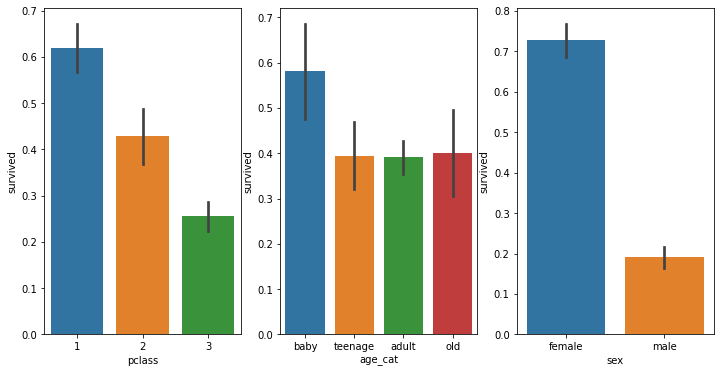

In [59]:
df['age_cat'] = pd.cut(df['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['c'])
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,3,1)
graph2 = fig.add_subplot(1,3,2)
graph3 = fig.add_subplot(1,3,3)

sns.barplot('pclass', 'survived', data=df, ax=graph1)
sns.barplot('age_cat', 'survived', data=df, ax=graph2)
sns.barplot('sex', 'survived', data=df, ax=graph3)

## 성별, 부모/자녀수, 형제/부부수 한꺼번에

In [201]:
how = {
    'survived':np.mean
}
df.groupby(['sex', 'parch', 'sibsp']).agg(how)

survived
sex    parch sibsp          
female 0     0      0.731959
             1      0.766667
             2      0.714286
             3      1.000000
       1     0      0.909091
             1      0.767442
             2      1.000000
             3      0.000000
       2     0      0.793103
             1      0.777778
             2      0.500000
             3      0.600000
             4      0.285714
             5      0.000000
             8      0.000000
       3     0      1.000000
             1      0.666667
             2      1.000000
       4     0      0.000000
             1      0.500000
       5     0      0.000000
             1      0.500000
       6     1      0.000000
       9     1      0.000000
male   0     0      0.162752
             1      0.204301
             2      0.105263
             3      0.000000
       1     0      0.421053
             1      0.425532
             2      0.500000
             3      0.250000
             4      0.000000
       2     0      0.500000
             1      0.363636
             2      0.500000
             3      0.000000
             4      0.200000
             5      0.000000
             8      0.000000
       3     1      0.000000
       4     1      0.000000
       5     1      0.000000
       6     1      0.000000
       9     1      0.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


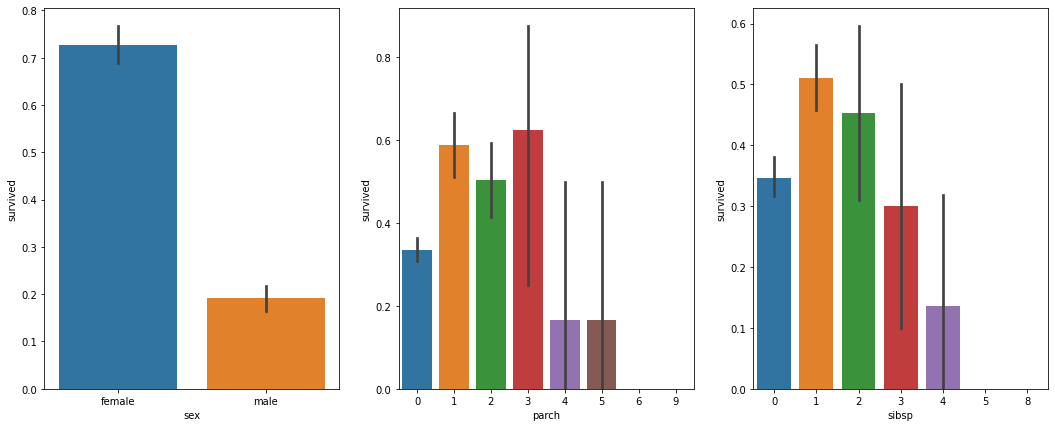

In [209]:
fig = plt.figure(figsize=(18,7))
graph1 = fig.add_subplot(1,3,1)
graph2 = fig.add_subplot(1,3,2)
graph3 = fig.add_subplot(1,3,3)

sns.barplot('sex', 'survived', data=df, ax=graph1)
sns.barplot('parch', 'survived', data=df, ax=graph2)
sns.barplot('sibsp', 'survived', data=df, ax=graph3)


## 연령대별 분포 생존자, 사망자 비교

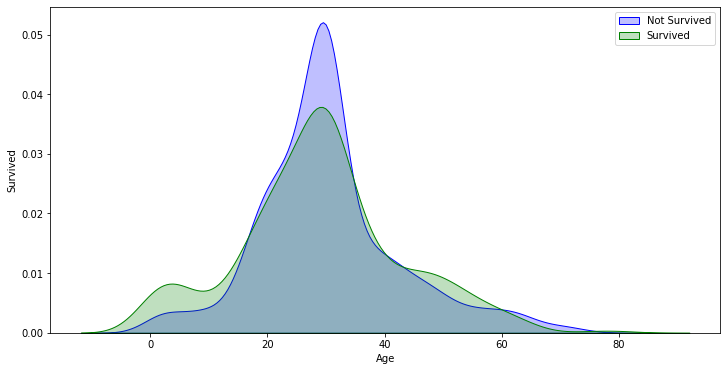

In [273]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,1,1)
sns.kdeplot(df["age"][(df["survived"] == 0) & (df["age"].notnull())], 
                ax = graph1, color="Blue", shade = True)
sns.kdeplot(df["age"][(df["survived"] == 1) & (df["age"].notnull())], 
                ax =graph1, color="Green", shade= True)
graph1.set_xlabel("Age")
graph1.set_ylabel("Frequency")
graph1.legend(["Not Survived","Survived"])

## 객실 등급별 분포 생존자, 사망자 비교

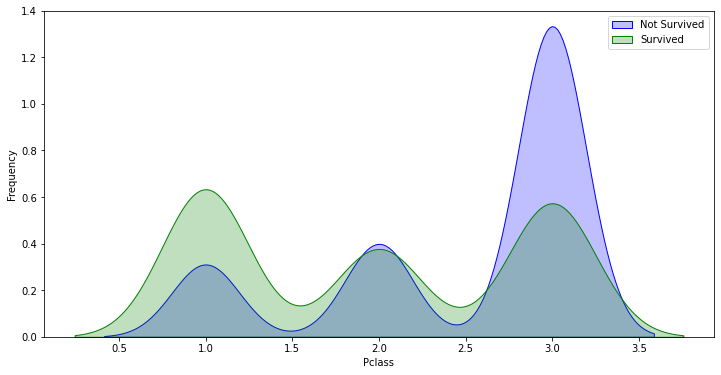

In [274]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,1,1)
sns.kdeplot(df["pclass"][(df["survived"] == 0) & (df["pclass"].notnull())], 
                ax = graph1, color="Blue", shade = True)
sns.kdeplot(df["pclass"][(df["survived"] == 1) & (df["pclass"].notnull())], 
                ax =graph1, color="Green", shade= True)
graph1.set_xlabel("Pclass")
graph1.set_ylabel("Frequency")
graph1.legend(["Not Survived","Survived"])